# Clasificación de margen máximo con máquinas de vectores de soporte #
Otro algoritmo de aprendizaje potente y ampliamente utilizado es la **máquina de vectores de soporte (SVM)**, que puede considerarse una extensión del perceptrón. Al utilizar el algoritmo perceptron, se minimizan los errores de clasificación errónea. Sin embargo, en SVM el objetivo de optimización es maximizar el margen. El **margen** se define como la distancia entre el hiperplano de separación (límite de decisión) y los ejemplos de entrenamiento más cercanos a este hiperplano, que son los llamados **vectores de soporte**.

![Margenes maximizados](imgs/maxmargin.png)

### Intuición sobre el margen máximo ###
La razón detras de tener límites de decisión con márgenes grandes es que tienden a tener menores errores de generalización, mientras que los modelos con márgenes pequeños son más propensos al sobreajuste. Para tener una idea sobre la maximización de margenes, nos vamos a centrar esos hiperplanos positivo y negativo paralelos a el límite de decisión, que se pueden expresar como:

$$\begin{equation*} w_0 + \mathbf{w}^T\mathbf{x}_{pos}=1\end{equation*}$$
$$\begin{equation*} w_0 + \mathbf{w}^T\mathbf{x}_{neg}=-1\end{equation*}$$

Si restamos estas dos ecuaciones, se tiene:

$$\Rightarrow \mathbf{w}^T \big(\mathbf{x}_{pos} - \mathbf{x}_{new} \big) = 2 $$

Se pude normalizar la ecuación mediante la norma o longitud del vector $w$, que se define como:

$$ \begin{Vmatrix}\mathbf{w}\end{Vmatrix} = \sqrt{\sum_{j=1}^m w_j^2}$$

Así se llega a la siguiente equación:

$$\begin{equation*}\frac{ \mathbf{w}^T \big(\mathbf{x}_{pos} - \mathbf{x}_{neg} \big)}{\begin{Vmatrix}\mathbf{w}\end{Vmatrix}} = \frac{2}{\begin{Vmatrix}\mathbf{w}\end{Vmatrix}} \end{equation*}$$

La exprsión de la izquierda se puede interpretar como la distancia entre el hiperploano positivo y negativo, que es lo que se denomina **margen** y se quiere maximizar.

Ahora, la función objetivo de la SVM se convierte en la maximización de este margen maximizando $\frac{2}{\begin{Vmatrix}\mathbf{w}\end{Vmatrix}}$ bajo la restrición de que los ejemplos se han clasificado correctamente, que se puede escribir como:

$$\begin{equation*}w_0 + \mathbf{w}^T\mathbf{x}^{(i)} \geq 1\,\, si y^{(i)}=1 \end{equation*}$$

$$\begin{equation*}w_0 + \mathbf{w}^T\mathbf{x}^{(i)} \leq -1\,\, si y^{(i)}=-1\end{equation*}$$

$$ para\,i = 1...N$$

Donde $N$ es el número de ejemplos en el conjunto de datos.

Estas dos ecuaciones básicamente dicen que todos los ejemplos de clase negativa deben caer en el lado negativo del hiperplano negativo, mientras que los ejemplos de clase positiva caeran en el lado positivo del hiperplano positivo, lo cual se puede escribri de forma más compacta como sigue:

$$\begin{equation}y^{(i)}\big(w_0 + \mathbf{w}^T\mathbf{x}^{(i)}\big) \geq 1\,\, \forall i\end{equation}$$

En la práctica es más sencillo minimizar el termino reciproco, $\frac{1}{2}\begin{Vmatrix}\mathbf{w}\end{Vmatrix}^2$, que se puede resolver mediante programación cuadrática

### Manejo de un caso separable no lineal utilizando variables de holgura ###
Se mencionara brevemente la variable de holgura, $\xi$, que introdujo Vladimir Vapnik en 1995 y condujo a la denominada **clasificación de margen blando**. La motivación para introducir la variable de holgura fue que las restricciones lineales necesitan ser relajadas para datos separables no linealmente para permitir la convergencia de la optimización en presencia de clasificaciones erróneas, bajo penalización de coste apropiada.

La variable de holgura de valor positivo simplemente se agrega a las restricciones lineales:

$$\begin{equation*}w_0 + \mathbf{w}^T\mathbf{x}^{(i)} \geq 1 - \xi\,\, si y^{(i)}=1 \end{equation*}$$

$$\begin{equation*}w_0 + \mathbf{w}^T\mathbf{x}^{(i)} \leq -1 + \xi\,\, si y^{(i)}=-1\end{equation*}$$

$$ para\,i = 1...N$$

Aquí, N es el número de ejemplos en nuestro conjunto de datos. Así, el nuevo objetivo a minimizar (sujeto a las restricciones) se convierte en:

$$\begin{equation*}\frac{1}{2}\begin{Vmatrix}\mathbf{w}\end{Vmatrix}^2 + C\bigg(\sum_{i}\xi^{(i)}\bigg) \end{equation*}$$

A través de la variable, `C` podemos controlar la penalización por clasificación errónea. Valores grandes de `C` corresponden a penalizaciones por errores grandes, mientras que se es menos estrictos con respecto a los errores de clasificación errónea si se elegen valores más pequeños para `C`. Por lo tanto, se puede usar el parámetro `Cp` para controlar el ancho del margen y, por lo tanto, ajustar el equilibrio de sesgo-varianza, como se ve en la siguiente figura:

![Margenes maximizados](imgs/variablesolgura.png)

Este concepto está relacionado con la regularización, donde la disminución del valor de `C` aumenta el sesgo y disminuye la varianza del modelo.

### Entrenamiento de un modelo SVM ###

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import train_test_split
from decisionregion import plot_decision_regions
from sklearn.preprocessing import StandardScaler

In [3]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [4]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

<IPython.core.display.Javascript object>


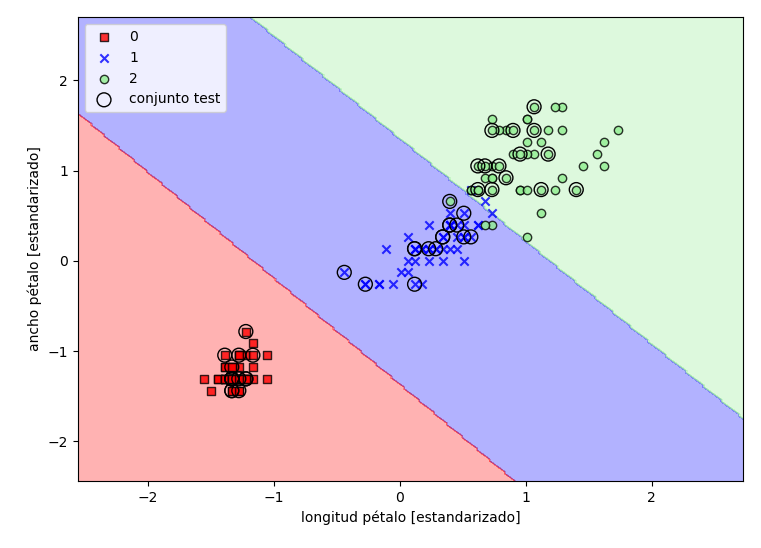

In [5]:
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105,150))
plt.xlabel('longitud pétalo [estandarizado]')
plt.ylabel('ancho pétalo [estandarizado]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

> ##### Regresión logística versus SVMs #####
> En tareas prácticas de clasificación, la regresión logística lineal y las SVM lineales a menudo arrojan resultados muy parecidos. La regresión logística intenta maximizar las probabilidades condicionales de los datos de entrenamiento, lo que lo hace más propenso a los valores atípicos que los SVM, que en su mayoría se preocupan por los puntos más cercanos al límite de decisión (vectores de soporte). Por otro lado, la regresión logística tiene la ventaja de que es un modelo más simple y puede implementarse más fácilmente. Además, los modelos de regresión logística se pueden actualizar fácilmente, lo cual es atractivo cuando se trabaja con flujos de datos.

### Implementaciones alternativas en scikit-learn ###
La clase `LogisticRegression` de la biblioteca scikit-learn utiliza la biblioteca LIBLINEAR, que es una biblioteca C/C++ altamente optimizada desarrollada en la Universidad Nacional de Taiwán.

Del mismo modo, la clase `SVC` que utilizamos para entrenar un SVM hace uso de LIBSVM, que es una biblioteca C/C++ equivalente especializada para SVM.

La ventaja de usar LIBLINEAR y LIBSVM sobre las implementaciones nativas de Python es que permiten el entrenamiento extremadamente rápido de grandes cantidades de clasificadores lineales. Sin embargo, a veces nuestros conjuntos de datos son demasiado grandes para caber en la memoria de la computadora. Por ello, scikit-learn también ofrece implementaciones alternativas a través de la clase `SGDClassifier`, que también admite el aprendizaje en línea a través del método `partial_fit`. El concepto detrás de la clase `SGDClassifier` es similar al algoritmo del gradiente descendente estocástico. Se puede inicializar la versión SGD del perceptrón, la regresión logística y un SVM con parámetros predeterminados, de la siguiente manera:

In [ ]:
from sklearn.linear_model import SGDClassifier
pnn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

### Resolución de problemas no lineales usando un kernel SVM ###
La idea básica de los **métodos de kernel** para tratar los datos no separable linealmente es crear combinaciones no lineales de las características originales para proyectarlas en un espacio de una dimensión mayor por medio de una función de mapeo, $\phi$, donde los datos se convierten en linealmente separables. Como se muestra en la siguiente gráfica, se puede transformar un conjunto de datos de dos dimensiones en un nuevo espacio de características de tres dimensiones, donde las clase se convierten en separables por medio de la proyección:

$$\begin{equation}\phi\big(x_1, x_2\big) = \big(z_1, z_2, z_3\big) = \Big(x_1, x_2, x_1^2 + x_2^2\Big)\end{equation}$$

Esto permite separar las dos clases mostradas en la gráfica mediante un hiperplano lineal que se convierte en un límite de decisión no lineal si se proyecta al espacio de características original.

![Idea de kernel](imgs/kernel_idea.png)


#### Utilización del truco del kernel para encontrar un hiperplano de separación en un espacio de alta dimensión ####
Para resolver un problema no lineal utilizando SVM, se transformarian los datos de entrenamiento en un espacio de características de dimensiones superiores a través de una función de mapeo, $\phi$, y entrenaríamos un modelo SVM lineal para clasificar los datos en este nuevo espacio de características. Entonces, podríamos usar la misma función de mapeo, $\phi$, para transformar datos nuevos no vistos para clasificarlos usando el modelo lineal SVM.

Sin embargo, un problema con este enfoque de mapeo es que la construcción de las nuevas características es computacionalmente muy costosa, especialmente si se trata de datos de alta dimensión. Aquí es donde entra en juego el llamado **truco del kernel**.

Para entrenar un SVM, en la práctica, solo necesitamos reemplazar el producto escalar $\mathbf{x}^{(i)T}\mathbf{x}^{(j)}$ por $\phi\big(\mathbf{x}^{(i)}\big)^T \phi\big(\mathbf{x}^{(j)}\big)$. Para ahorrar el costoso paso de calcular este producto escalar entre dos puntos explícitamente, definimos la llamada **función del kernel**:

$$\begin{equation}\kappa\big(\mathbf{x}^{(i)}, \mathbf{x}^{(j)}\big) = \phi\big(\mathbf{x}^{(i)}\big)^T \phi\big(\mathbf{x}^{(j)}\big)\end{equation}$$

Uno de los kernel más utilizados es el kernel de **función de base radial** (**RBF** radial basis function), que simplemente puede denominarse **kernel gaussiano**:

$$\begin{equation}\kappa\big(\mathbf{x}^{(i)}, \mathbf{x}^{(j)}\big) = exp\, \Bigg(-\frac{\begin{Vmatrix}\mathbf{x}^{(i)} - \mathbf{x}^{(j)}\end{Vmatrix}^2}{2\sigma^2}\Bigg)\end{equation}$$

Que se suele simplificar por:

$$\begin{equation}\kappa\big(\mathbf{x}^{(i)}, \mathbf{x}^{(j)}\big) = exp\, \Big(-\gamma\begin{Vmatrix}\mathbf{x}^{(i)} - \mathbf{x}^{(j)}\end{Vmatrix}^2\Big)\end{equation}$$

Donde $\gamma = \frac{1}{2\sigma^2}$ es un parámetro optimizable.

En términos generales, el término "kernel" puede interpretarse como una **función de similitud** entre un par de ejemplos. El signo menos invierte la medida de la distancia en una calificación de similitud y, debido al término exponencial, la calificación de similitud resultante caerá en un rango entre 1 (para ejemplos exactamente similares) y 0 (para ejemplos muy diferentes).

### Entrenamiento de un kernel SVM para clasificación no lineal ###
Lo primero que se va a hacer es crear un conjunto de datos sintético que tiene la forma de una puerta XOR usando la función `logical_xor` de NumPy, donde se asignarán 100 ejemplos a la etiqueta de clase 1, y 100 ejemplos se asignarán a la etiqueta de clase -1:

<IPython.core.display.Javascript object>


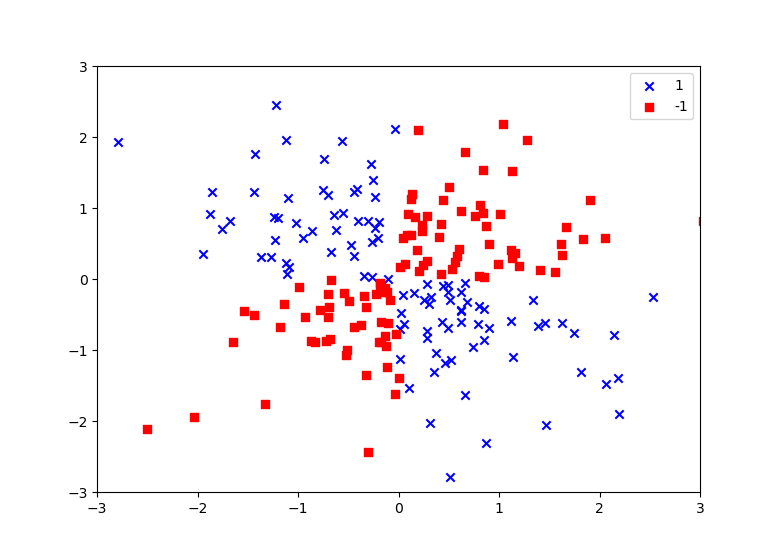

In [6]:
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, 
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r', marker='s',
            label='-1')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc='best')
plt.show()

Ahora se utiliza la clase `SVC` de scikit-learn pero con el parámetro `kernel='rbf'`. Como se puede ver en la gráfica resultante, el kernel SVM separa los datos XOR relativamente bien:

<IPython.core.display.Javascript object>


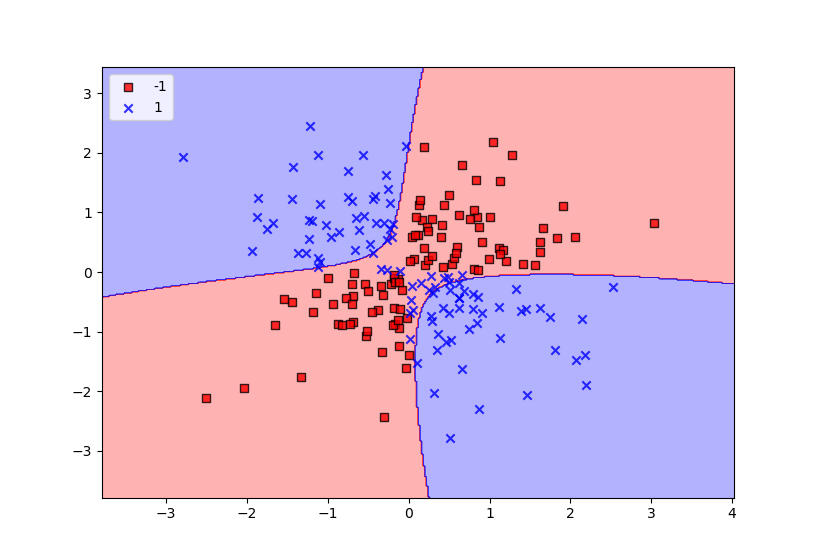

In [8]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

El parámetro $\gamma$, que se establece en `gamma=0.1`, puede entenderse como un parámetro de corte para la esfera gaussiana. Si aumentamos el valor de $\gamma$, aumentamos la influencia o el alcance de los ejemplos de entrenamiento, lo que conduce a un límite de decisión más estricto y desigual. Para comprender mejor $\gamma$, se va a aplicar un modelo SVM de kernel RBF al conjunto de datos de flores Iris:

<IPython.core.display.Javascript object>


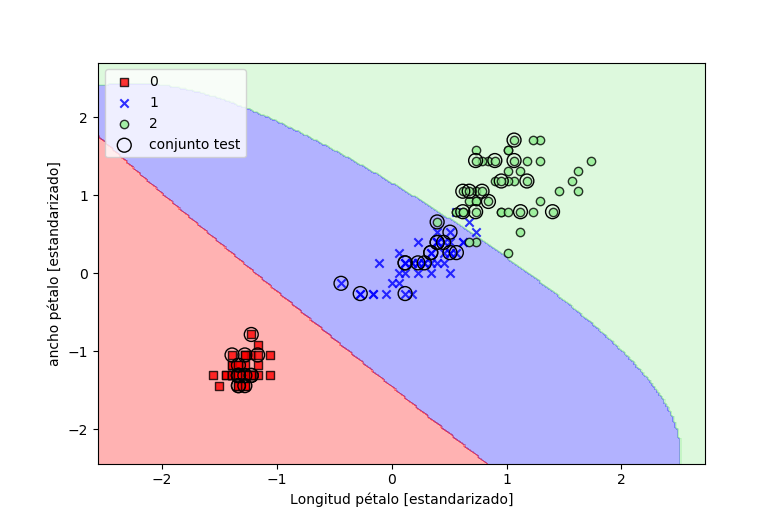

In [9]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined, classifier=svm,
                      test_idx=range(105,150))
plt.xlabel('Longitud pétalo [estandarizado]')
plt.ylabel('ancho pétalo [estandarizado]')
plt.legend(loc='upper left')
plt.show()

Si se incrementa el valor de $\gamma$, se observa el efecto en los límites de decisión

<IPython.core.display.Javascript object>


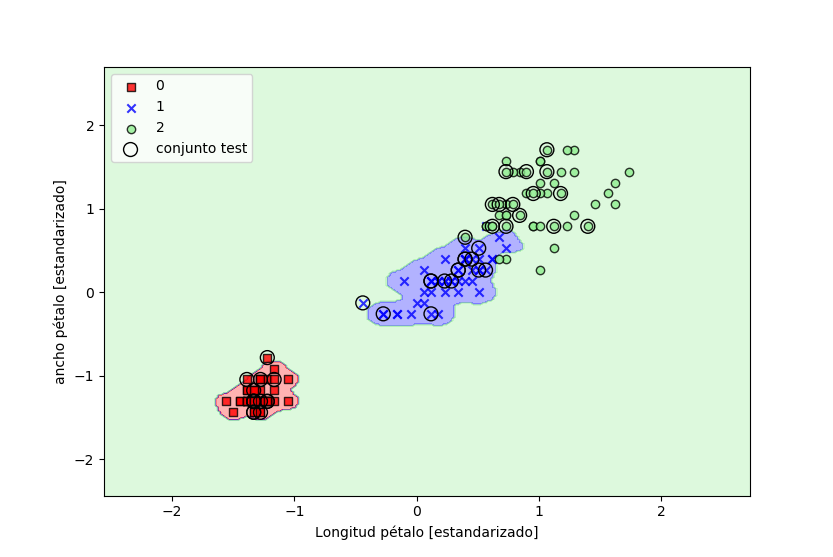

In [10]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined, classifier=svm,
                      test_idx=range(105,150))
plt.xlabel('Longitud pétalo [estandarizado]')
plt.ylabel('ancho pétalo [estandarizado]')
plt.legend(loc='upper left')
plt.show()

En la gráfica resultante, se puede ver que el límite de decisión alrededor de las clases `0` y `1` es mucho más estricto usando un valor relativamente grande de \gamma.

Aunque el modelo se ajusta muy bien al conjunto de datos de entrenamiento, es probable que un clasificador de este tipo tenga un alto error de generalización en datos no vistos. Esto ilustra que el parámetro también juega un papel importante en el control del sobreajuste o la varianza cuando el algoritmo es demasiado sensible a las fluctuaciones en el conjunto de datos de entrenamiento.